<a href="https://colab.research.google.com/github/hungpham13/Distributed-data-discretization/blob/main/Data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# !git clone https://github.com/hungpham13/Distributed-data-discretization
# %cd Distributed-data-discretization/
# !pip install -r requirements.txt

In [26]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Generating normal distribution, 365 days, 10000 samples...


100%|██████████| 364/364 [00:46<00:00,  7.77it/s]


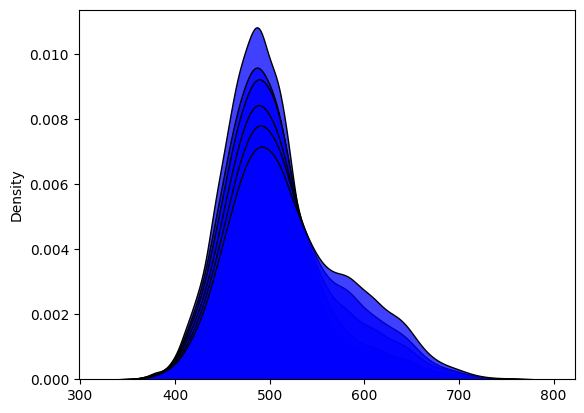

[[505 480 452 ... 533 476   0]
 [453 482 437 ... 498 522   0]
 [509 503 477 ... 530 590   0]
 [494 498 517 ... 540 495   0]
 [432 463 498 ... 460 434   0]]


In [1]:
from data.gen_data import generate_data
data = generate_data(365, 10000, 'normal', visualize=True)

In [3]:
import numpy as np
data[0, :-1]
print(np.max(data[:,:-1]), np.max(data[:,:-1]) <= 850)
print(np.min(data[:, :-1]), np.min(data[:, :-1]) >=300)

838 True
309 True


In [4]:
from model.psi import get_breakpoint 
from model.psi import calculate_psi

breakpoints = get_breakpoint(data[:,:-1].reshape(-1), buckettype='bins', buckets=10)
print(breakpoints)
for i in range(len(data) - 1):
    psi = calculate_psi(expected=data[i, :-1], actual=data[i + 1, :-1],
                        breakpoints=breakpoints)
    if (data[i + 1, -1] == 0 and psi > 0.1):
        print(psi)

[309.  361.9 414.8 467.7 520.6 573.5 626.4 679.3 732.2 785.1 838. ]
0.2486152800681495
